<a href="https://colab.research.google.com/github/nhjung74/DFC615-FINAL/blob/main/NLP_MRC_JNH_2020517002_FINAL_PROJECT_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFC615(00) 인공지능과자연언어처리기술 Final Project

```
학번 : 2020517002
이름 : 정낙현
학과 : 디지털융합금융학과 3기
email: nhjung74@korea.ac.kr
```



#1.환경 세팅

##1.1 구글 드라이브 연동
 

In [ ]:
# https://colab.research.google.com/drive/1EebE_t1s3hS6_oAvPH5DiOsLq3WlTTRZ?usp=sharing#scrollTo=OLrvpcBDTP97
import os
from google.colab import drive
drive.mount('/content/gdrive/') 
os.chdir('/content/gdrive/My Drive/Colab Notebooks/DFC615') ## 현재 작업 환경으로 설정한 경로를 입력하세요

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!ls -ltr

total 455942
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.9
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.8
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.7
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.6
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.5
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.4
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.3
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.2
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.10
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json.1
-rw------- 1 root root 38527475 Jun  7 01:53 KorQuAD_v1.0_train.json
-rw------- 1 root root  3881058 Jun  7 01:53 KorQuAD_v1.0_dev.json.9
-rw------- 1 root root  3881058 Jun  7 01:53 KorQuAD_v1.0_dev.json.8
-rw------- 1 root root  3881058 Jun  7 01:53 KorQuAD_v1.0_dev.json.7


# 2.데이터셋

## 2.1 Dataset

 ###MRC on [Korqard](https://korquad.github.io/KorQuad%201.0/) with Language Model

#### **한국어 기계 독해 기반의 질의 응답 데이터셋**

```
KorQuAD 1.0: https://korquad.github.io/KorQuad%201.0/

KorQuAD 2.0: https://korquad.github.io/
```

```
KorQuAD는 한국어 기반의 기계 독해를 위해 제작한 데이터셋이며, 데이터셋은 지문과 질의 답변으로 이루어져 있습니다.
```





In [ ]:
import json
os.chdir('/content/gdrive/My Drive/Colab Notebooks/DFC615')
gdrive_path = "/content/gdrive/My Drive/Colab Notebooks/DFC615"
!wget https://korquad.github.io/dataset/KorQuAD_v1.0_train.json
!wget https://korquad.github.io/dataset/KorQuAD_v1.0_dev.json


--2021-06-25 02:19:50--  https://korquad.github.io/dataset/KorQuAD_v1.0_train.json
Resolving korquad.github.io (korquad.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to korquad.github.io (korquad.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38527475 (37M) [application/json]
Saving to: ‘KorQuAD_v1.0_train.json.11’

KorQuAD_v1.0_train. 100%[===================>]  36.74M  63.9MB/s    in 0.6s    

2021-06-25 02:19:52 (63.9 MB/s) - ‘KorQuAD_v1.0_train.json.11’ saved [38527475/38527475]

--2021-06-25 02:19:53--  https://korquad.github.io/dataset/KorQuAD_v1.0_dev.json
Resolving korquad.github.io (korquad.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to korquad.github.io (korquad.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3881058 (3.7M) [application/json]
Saving to: ‘KorQuAD_v1.0_dev.json.11’

KorQuAD_v1.0_dev.js 1

In [ ]:
output_dir = gdrive_path
train_file = os.path.join(gdrive_path, "KorQuAD_v1.0_train.json")
dev_file = os.path.join(gdrive_path, "KorQuAD_v1.0_dev.json")

korquad_train = json.load(open(train_file,'r',encoding='utf-8'))    
korquad_dev = json.load(open(dev_file,'r',encoding='utf-8'))    

In [ ]:
print(korquad_train.keys())
#print(korquad_train.values()) # 로딩 시간이 조금 걸려요

## 0번째 타이틀에 대한 지문 집합
print(korquad_train['version'])
print(len(korquad_train['data']))
print('-'*40)

print(korquad_train['data'][0].keys()) # title, paragraphs (위키피디아를 기준으로 제작한 데이터임을 고려하기!)
print(f"title: {korquad_train['data'][0]['title']}") # 제목은 하나 
print('-'*40)
print('paragraphs')
print(korquad_train['data'][0]['paragraphs']) 
print(len(korquad_train['data'][0]['paragraphs'])) # 지문은 N개
print('-'*40)

dict_keys(['version', 'data'])
KorQuAD_v1.0_train
1420
----------------------------------------
dict_keys(['paragraphs', 'title'])
title: 파우스트_서곡
----------------------------------------
paragraphs
[{'qas': [{'answers': [{'text': '교향곡', 'answer_start': 54}], 'id': '6566495-0-0', 'question': '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?'}, {'answers': [{'text': '1악장', 'answer_start': 421}], 'id': '6566495-0-1', 'question': '바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?'}, {'answers': [{'text': '베토벤의 교향곡 9번', 'answer_start': 194}], 'id': '6566495-0-2', 'question': '바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?'}, {'answers': [{'text': '파우스트', 'answer_start': 15}], 'id': '6566518-0-0', 'question': '1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?'}, {'answers': [{'text': '합창교향곡', 'answer_start': 354}], 'id': '6566518-0-1', 'question': '파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?'}, {'answers': [{'text': '1839', 'answer_start': 0}], 'id': '5917067-0-0', 'question': '바그너가 파우스트를 처음으로 읽은 년도는?'}, {'answers': [{'text': '파리', 'answer_start': 410}], 'id': '5917067-0

In [ ]:
# 0번째 타이틀의 0번째 지문에 대한 {"질의응답": ~~ , "지문":   ~~}
print(korquad_train['data'][0]['paragraphs'][0].keys()) # qas (question answering), context
print(korquad_train['data'][0]['paragraphs'][0]['qas'])
print(len(korquad_train['data'][0]['paragraphs'][0]['qas'])) # 질의 응답 쌍도 M개
print('-'*40)
print('context')
print(korquad_train['data'][0]['paragraphs'][0]['context'])


dict_keys(['qas', 'context'])
[{'answers': [{'text': '교향곡', 'answer_start': 54}], 'id': '6566495-0-0', 'question': '바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?'}, {'answers': [{'text': '1악장', 'answer_start': 421}], 'id': '6566495-0-1', 'question': '바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?'}, {'answers': [{'text': '베토벤의 교향곡 9번', 'answer_start': 194}], 'id': '6566495-0-2', 'question': '바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?'}, {'answers': [{'text': '파우스트', 'answer_start': 15}], 'id': '6566518-0-0', 'question': '1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?'}, {'answers': [{'text': '합창교향곡', 'answer_start': 354}], 'id': '6566518-0-1', 'question': '파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?'}, {'answers': [{'text': '1839', 'answer_start': 0}], 'id': '5917067-0-0', 'question': '바그너가 파우스트를 처음으로 읽은 년도는?'}, {'answers': [{'text': '파리', 'answer_start': 410}], 'id': '5917067-0-1', 'question': '바그너가 처음 교향곡 작곡을 한 장소는?'}, {'answers': [{'text': '드레스덴', 'answer_start': 534}], 'id': '5917067-0-2', 'question': '바그너의 1악장의 초연은 어디서 연주되었는가?'}]
8
---------------

In [ ]:
print('-'*40)
print('Question')
print(korquad_train['data'][0]['paragraphs'][0]['qas'][0]['question'])
print("Answer")
print(korquad_train['data'][0]['paragraphs'][0]['qas'][0]['answers']) 
print('\n')
print('Question')
print(korquad_train['data'][0]['paragraphs'][0]['qas'][1]['question'])
print("Answer")
print(korquad_train['data'][0]['paragraphs'][0]['qas'][1]['answers']) 
print('\n')
print('Question')
print(korquad_train['data'][0]['paragraphs'][0]['qas'][2]['question'])
print("Answer")
print(korquad_train['data'][0]['paragraphs'][0]['qas'][2]['answers']) 


----------------------------------------
Question
바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?
Answer
[{'text': '교향곡', 'answer_start': 54}]


Question
바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?
Answer
[{'text': '1악장', 'answer_start': 421}]


Question
바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?
Answer
[{'text': '베토벤의 교향곡 9번', 'answer_start': 194}]


In [ ]:
train_cnt, val_cnt = 0, 0
for idx, train in enumerate(korquad_train['data']):
    title_name = train['title']
    for paragraph in train['paragraphs']:
        context=paragraph['context'] 
        for qas in paragraph['qas']:
            train_cnt += 1

for idx, train in enumerate(korquad_dev['data']): 
    title_name = train['title']
    for paragraph in train['paragraphs']:
        context=paragraph['context'] 
        for qas in paragraph['qas']:
            val_cnt += 1
print(f'Train: {train_cnt} | Val: {val_cnt}')


Train: 60407 | Val: 5774


#3.모델 학습


###3.1. **사전 훈련된 Language Model ( Bert , KoELECTRA,kobert) 활용하여 MRC 해결**



In [ ]:
# !pip install sentencepiece
!pip install transformers==3.3.1
!pip install seqeval
!pip install fastprogress
!pip install attrdict
!pip uninstall pandas
!pip install pandas==1.1.5
!pip install konlpy
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Uninstalling pandas-1.1.5:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.1.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.1.5
  Using cached https://files.pythonhosted.org/packages/fd/70/e8eee0cbddf926bf51958c7d6a86bc69167c300fa2ba8e592330a2377d1b/pandas-1.1.5-cp37-cp37m-manylinux1_x86_64.whl


## 3.2 필요한 라이브러리

In [ ]:
from __future__ import print_function

from collections import Counter
import sys
import argparse
import string
import re
import glob
import logging
import random
import timeit

# 형태소분석
import nltk
import konlpy

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data.distributed import DistributedSampler
from fastprogress.fastprogress import master_bar, progress_bar
from attrdict import AttrDict

from transformers import (
    AdamW,
    get_linear_schedule_with_warmup,
    squad_convert_examples_to_features
)
from transformers.data.metrics.squad_metrics import (
    compute_predictions_logits,
    squad_evaluate,
)

# https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/
from transformers import (
    ElectraForQuestionAnswering,
    XLMRobertaForQuestionAnswering,
    BertForQuestionAnswering,
    
    ElectraTokenizer,
    XLMRobertaTokenizer,
    BertTokenizer,

    ElectraConfig,
    XLMRobertaConfig,
    BertConfig,
)
from transformers.data.processors.squad import SquadResult, SquadV1Processor, SquadV2Processor
from transformers import pipeline
logger = logging.getLogger(__name__)

## 3.3 Fine-Tuning을 위한 코드

### 3.3.1 토크나이저 정의 : kobert 등 별도 정의된 모델사용시

In [ ]:
# coding=utf-8
# Copyright 2018 Google AI, Google Brain and Carnegie Mellon University Authors and the HuggingFace Inc. team and Jangwon Park
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
""" Tokenization classes for KoBert model."""


import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def get_vocab(self):
        return dict(self.token2idx, **self.added_tokens_encoder)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A KoBERT sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A KoBERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [ ]:
def init_logger():
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )

def set_seed(args):
    random.seed(args.seed)
    np.random.seed(args.seed)
    torch.manual_seed(args.seed)
    if not args.no_cuda and torch.cuda.is_available():
        torch.cuda.manual_seed_all(args.seed)

MODEL_FOR_QUESTION_ANSWERING = {
    "koelectra-base-v3": ElectraForQuestionAnswering,
    "koelectra-small-v3": ElectraForQuestionAnswering,
    "bert-base-uncased" : BertForQuestionAnswering,
    "bert-base-multilingual-cased" : BertForQuestionAnswering,
    "kobert" : BertForQuestionAnswering,
    "beomi/kcbert-base" : BertForQuestionAnswering,
    "monologg/kobert" : BertForQuestionAnswering,
}
TOKENIZER_CLASSES = {
    "koelectra-base-v3": ElectraTokenizer,
    "koelectra-small-v3": ElectraTokenizer,
    "bert-base-uncased": BertTokenizer,
    "bert-base-multilingual-cased": BertTokenizer,
    "bert-base-multilingual-uncased" : BertTokenizer,
    "kobert" :BertTokenizer , # KoBertTokenizer,
    "beomi/kcbert-base" :BertTokenizer , # KoBertTokenizer,
    "monologg/kobert" :KoBertTokenizer , # KoBertTokenizer,
}
CONFIG_CLASSES = {
    "koelectra-base-v3": ElectraConfig,
    "koelectra-small-v3": ElectraConfig,
    "bert-base-uncased": BertConfig,
    "bert-base-multilingual-cased": BertConfig,
    "bert-base-multilingual-uncased" : BertConfig,
    "kobert" : BertConfig,
    "beomi/kcbert-base" : BertConfig,
    "monologg/kobert" : BertConfig,
}

In [ ]:

'''KorQuAD v1.0에 대한 공식 평가 스크립트 '''
'''본 스크립트는 SQuAD v1.1 평가 스크립트 https://rajpurkar.github.io/SQuAD-explorer/ 를 바탕으로 작성됨.'''

import re
from konlpy.tag import Twitter


stopwords = ['에서는','라는','로','과','로서','이후','은','는','를','의','에','이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말',  '그렇', '위하']


def normalize_answer(s):

    # 《 inside 》 인지 판단
    begin_1, end_1 = s.find('《'), s.find('》')    
    begin_2, end_2 = s.find('('), s.find(')')   
    begin_3, end_3 = s.find('<'), s.find('>')

    inside_bracket = False
    if begin_1 >-1 and begin_1 < end_1 :
        #print("《 inside 》")
       inside_bracket = True
    elif begin_2 >-1 and begin_2 < end_1 :
        #print("( inside )")
       inside_bracket = True
    elif begin_3 >-1 and begin_3 < end_1 :
        #print("< inside >")
       inside_bracket = True
    else :
       #print("NOPE 《 》")
       inside_bracket = False
      

    # remove text inside brackets
    def remove_brace(string):
        string=re.sub("\(.*?\)","()",string)
        string = re.sub(r'[()]', '', string)
        return string

    def remove_(text):
        ''' 불필요한 기호 제거 '''
        text = re.sub("'", " ", text)
        text = re.sub('"', " ", text)
        text = re.sub('《', " ", text)
        text = re.sub('》', " ", text)
        text = re.sub('<', " ", text)
        text = re.sub('>', " ", text)
        text = re.sub('〈', " ", text)
        text = re.sub('〉', " ", text)
        text = re.sub("\(", " ", text)
        text = re.sub("\)", " ", text)
        text = re.sub("‘", " ", text)
        text = re.sub("’", " ", text)
        return text

    # 불용어를 제거한다
    def remove_stopword(document):
        # 고유명사가 아닌경우 불용어 제거 
        if(inside_bracket == False) :
            twitter = Twitter()
            clean_words = [] 
            for word in twitter.morphs(document): 
                if word not in stopwords: #불용어 제거
                    clean_words.append(word)  
            remove_document = ' '.join(clean_words)  
        else :
            remove_document = document
        return (remove_document)        

    # 형태소 분석을 해서 조사를 떼어준다
    def remove_josa(document):
        # 고유명사가 아닌경우 형태소 분석을 해서 조사를 떼어준다
        if(inside_bracket == False) :      
            twitter = Twitter()
            twitter_morphs =twitter.pos(document)
            Noun_words = []
            for word, pos in twitter_morphs:    
                if pos != 'Josa':
                    Noun_words.append(word)

            join_text = ''.join(Noun_words)   
        else :
            join_text =   document
        return join_text


    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_punc(lower(remove_(s))))
    # remove text inside brackets
    # 불용어제거 -> 조사제거 or 조사제거 ->불용어제거 둘다 테스트필요 
    #return white_space_fix(remove_josa(remove_stopword(remove_punc(lower(remove_(remove_brace(s)))))))


def f1_score(prediction, ground_truth):
    prediction_tokens = normalize_answer(prediction).split()
    ground_truth_tokens = normalize_answer(ground_truth).split()

    # F1 by character
    prediction_Char = []
    for tok in prediction_tokens:
        now = [a for a in tok]
        prediction_Char.extend(now)

    ground_truth_Char = []
    for tok in ground_truth_tokens:
        now = [a for a in tok]
        ground_truth_Char.extend(now)

    common = Counter(prediction_Char) & Counter(ground_truth_Char)
    num_same = sum(common.values())
    if num_same == 0:
        return 0

    precision = 1.0 * num_same / len(prediction_Char)
    recall = 1.0 * num_same / len(ground_truth_Char)
    f1 = (2 * precision * recall) / (precision + recall)

    return f1


def exact_match_score(prediction, ground_truth):
    return (normalize_answer(prediction) == normalize_answer(ground_truth))


def metric_max_over_ground_truths(metric_fn, prediction, ground_truths):
    scores_for_ground_truths = []
    for ground_truth in ground_truths:
        score = metric_fn(prediction, ground_truth)
        scores_for_ground_truths.append(score)
    return max(scores_for_ground_truths)


def evaluate(dataset, predictions):
    f1 = exact_match = total = 0
    for article in dataset:
        for paragraph in article['paragraphs']:
            for qa in paragraph['qas']:
                total += 1
                if qa['id'] not in predictions:
                    message = 'Unanswered question ' + qa['id'] + \
                              ' will receive score 0.'
                    print(message, file=sys.stderr)
                    continue
                ground_truths = list(map(lambda x: x['text'], qa['answers']))
                prediction = predictions[qa['id']]
                exact_match += metric_max_over_ground_truths(
                    exact_match_score, prediction, ground_truths)
                f1 += metric_max_over_ground_truths(
                    f1_score, prediction, ground_truths)

    exact_match = 100.0 * exact_match / total
    f1 = 100.0 * f1 / total
    return {'official_exact_match': exact_match, 'official_f1': f1}


def eval_during_train(args, step):
    expected_version = 'KorQuAD_v1.0'

    dataset_file = os.path.join(args.data_dir, args.predict_file)
    prediction_file = os.path.join(args.output_dir, 'predictions_{}.json'.format(step))

    with open(dataset_file) as dataset_f:
        dataset_json = json.load(dataset_f)
        read_version = "_".join(dataset_json['version'].split("_")[:-1])
        if (read_version != expected_version):
            print('Evaluation expects ' + expected_version +
                  ', but got dataset with ' + read_version,
                  file=sys.stderr)
        dataset = dataset_json['data']
    with open(prediction_file) as prediction_f:
        predictions = json.load(prediction_f)

    return evaluate(dataset, predictions)

## 3.4 Training

In [ ]:
logger = logging.getLogger(__name__)

import gc
gc.collect()

chk_pt_step = 0

def train(args, train_dataset, model, tokenizer):
    """ Train the model """
    train_sampler = RandomSampler(train_dataset)
    train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=args.train_batch_size)

    if args.max_steps > 0:
        t_total = args.max_steps
        args.num_train_epochs = args.max_steps // (len(train_dataloader) // args.gradient_accumulation_steps) + 1
    else:
        t_total = len(train_dataloader) // args.gradient_accumulation_steps * args.num_train_epochs

    # Prepare optimizer and schedule (linear warmup and decay)
    no_decay = ["bias", "LayerNorm.weight"]
    optimizer_grouped_parameters = [
        {
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": args.weight_decay,
        },
        {"params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], "weight_decay": 0.0},
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=args.learning_rate, eps=args.adam_epsilon)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=int(t_total * args.warmup_proportion), num_training_steps=t_total
    )

    # Check if saved optimizer or scheduler states exist
    if os.path.isfile(os.path.join(args.model_name_or_path, "optimizer.pt")) and os.path.isfile(
            os.path.join(args.model_name_or_path, "scheduler.pt")
    ):
        # Load in optimizer and scheduler states
        optimizer.load_state_dict(torch.load(os.path.join(args.model_name_or_path, "optimizer.pt")))
        scheduler.load_state_dict(torch.load(os.path.join(args.model_name_or_path, "scheduler.pt")))

    # Train!
    logger.info("***** Running training *****")
    logger.info("  Num examples = %d", len(train_dataset))
    logger.info("  Num Epochs = %d", args.num_train_epochs)
    logger.info("  Train batch size per GPU = %d", args.train_batch_size)
    logger.info(
        "  Total train batch size (w. parallel, distributed & accumulation) = %d",
        args.train_batch_size
        * args.gradient_accumulation_steps)
    logger.info("  Gradient Accumulation steps = %d", args.gradient_accumulation_steps)
    logger.info("  Total optimization steps = %d", t_total)

    global_step = 1
    chk_pt_step = 1
    epochs_trained = 0
    steps_trained_in_current_epoch = 0
    # Check if continuing training from a checkpoint
    if os.path.exists(args.model_name_or_path):
        try:
            # set global_step to gobal_step of last saved checkpoint from model path
            checkpoint_suffix = args.model_name_or_path.split("-")[-1].split("/")[0]
            global_step = int(checkpoint_suffix)
            epochs_trained = global_step // (len(train_dataloader) // args.gradient_accumulation_steps)
            steps_trained_in_current_epoch = global_step % (len(train_dataloader) // args.gradient_accumulation_steps)

            logger.info("  Continuing training from checkpoint, will skip to saved global_step")
            logger.info("  Continuing training from epoch %d", epochs_trained)
            logger.info("  Continuing training from global step %d", global_step)
            logger.info("  Will skip the first %d steps in the first epoch", steps_trained_in_current_epoch)
        except ValueError:
            logger.info("  Starting fine-tuning.")

    tr_loss, logging_loss = 0.0, 0.0
    model.zero_grad()
    mb = master_bar(range(int(args.num_train_epochs)))
    # Added here for reproductibility
    set_seed(args)

    for epoch in mb:
        epoch_iterator = progress_bar(train_dataloader, parent=mb)
        for step, batch in enumerate(epoch_iterator):
            # Skip past any already trained steps if resuming training
            if steps_trained_in_current_epoch > 0:
                steps_trained_in_current_epoch -= 1
                continue

            model.train()
            batch = tuple(t.to(args.device) for t in batch)

            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "token_type_ids": batch[2],
                "start_positions": batch[3],
                "end_positions": batch[4],
            }

            if args.model_type in ["xlm", "roberta", "distilbert", "distilkobert", "xlm-roberta","kobert"]:
                del inputs["token_type_ids"]

            if args.model_type in ["xlnet", "xlm"]:
                inputs.update({"cls_index": batch[5], "p_mask": batch[6]})
                if args.version_2_with_negative:
                    inputs.update({"is_impossible": batch[7]})
                if hasattr(model, "config") and hasattr(model.config, "lang2id"):
                    inputs.update(
                        {"langs": (torch.ones(batch[0].shape, dtype=torch.int64) * args.lang_id).to(args.device)}
                    )

            outputs = model(**inputs)
            # model outputs are always tuple in transformers (see doc)
            loss = outputs[0]

            if args.gradient_accumulation_steps > 1:
                loss = loss / args.gradient_accumulation_steps

            loss.backward()

            tr_loss += loss.item()
            if (step + 1) % args.gradient_accumulation_steps == 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), args.max_grad_norm)

                optimizer.step()
                scheduler.step()  # Update learning rate schedule
                model.zero_grad()
                global_step += 1

                # Log metrics
                if args.logging_steps > 0 and global_step % args.logging_steps == 0:
                    # Only evaluate when single GPU otherwise metrics may not average well
                    if args.evaluate_during_training:
                        results = evaluation(args, model, tokenizer, global_step=global_step)
                        for key in sorted(results.keys()):
                            logger.info("  %s = %s", key, str(results[key]))

                    logging_loss = tr_loss

                # Save model checkpoint
                if args.save_steps > 0 and global_step % args.save_steps == 0:
                    output_dir = os.path.join(args.output_dir, "checkpoint-{}".format(global_step))
                    if not os.path.exists(output_dir):
                        os.makedirs(output_dir)
                    # Take care of distributed/parallel training
                    model_to_save = model.module if hasattr(model, "module") else model
                    model_to_save.save_pretrained(output_dir)
                    tokenizer.save_pretrained(output_dir)

                    torch.save(args, os.path.join(output_dir, "training_args.bin"))
                    logger.info("Saving model checkpoint to %s", output_dir)
                    
                    #체크포인트스텝을 저장
                    chk_pt_step = global_step

                    if args.save_optimizer:
                        torch.save(optimizer.state_dict(), os.path.join(output_dir, "optimizer.pt"))
                        torch.save(scheduler.state_dict(), os.path.join(output_dir, "scheduler.pt"))
                        logger.info("Saving optimizer and scheduler states to %s", output_dir)

            if args.max_steps > 0 and global_step > args.max_steps:
                break

            # 캐쉬메모리 초기화
            #torch.cuda.empty_cache()   


        mb.write("Epoch {} done".format(epoch+1))

        if args.max_steps > 0 and global_step > args.max_steps:
            break
    del model
    return global_step, tr_loss / global_step , chk_pt_step


def evaluation(args, model, tokenizer, global_step=None):
    dataset, examples, features = load_and_cache_examples(args, tokenizer, evaluate=True, output_examples=True)

    if not os.path.exists(args.output_dir):
        os.makedirs(args.output_dir)

    # Note that DistributedSampler samples randomly
    eval_sampler = SequentialSampler(dataset)
    eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=args.eval_batch_size)

    # Eval!
    logger.info("***** Running evaluation {} *****".format(global_step))
    logger.info("  Num examples = %d", len(dataset))
    logger.info("  Batch size = %d", args.eval_batch_size)

    
    all_results = []
    start_time = timeit.default_timer()

    for batch in progress_bar(eval_dataloader):
        model.eval()
        batch = tuple(t.to(args.device) for t in batch)

        with torch.no_grad():
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "token_type_ids": batch[2],
            }

            if args.model_type in ["xlm", "roberta", "distilbert", "distilkobert", "xlm-roberta",  "xlm-roberta-large"]:
                del inputs["token_type_ids"]

            example_indices = batch[3]

            outputs = model(**inputs)
            
            start_logits = outputs[0] # bs 512
            end_logits = outputs[1] # torch.Tensor
            
            
            # print(len(start_logits)
            # print(len(start_logits[0]))
            
            
            
            
            
        # print(len(end_logits))
        # print(len(end_logits[0]))
        

        for i, example_index in enumerate(example_indices):
            start_logit = start_logits[i].cpu().tolist()
            end_logit = end_logits[i].cpu().tolist()
            # start_logits = start_logits[i]
            # end_logits = end_logits[i]
            # start_logits = start_logits[i]
            # end_logits = end_logits[i]
            eval_feature = features[example_index.item()]
            unique_id = int(eval_feature.unique_id)
            result = SquadResult(unique_id, start_logit, end_logit)

            all_results.append(result)

    evalTime = timeit.default_timer() - start_time
    logger.info("  Evaluation done in total %f secs (%f sec per example)", evalTime, evalTime / len(dataset))

    # Compute predictions
    output_prediction_file = os.path.join(args.output_dir, "predictions_{}.json".format(global_step))
    output_nbest_file = os.path.join(args.output_dir, "nbest_predictions_{}.json".format(global_step))

    if args.version_2_with_negative:
        output_null_log_odds_file = os.path.join(args.output_dir, "null_odds_{}.json".format(global_step))
    else:
        output_null_log_odds_file = None

    predictions = compute_predictions_logits(
        examples,
        features,
        all_results,
        args.n_best_size,
        args.max_answer_length,
        args.do_lower_case,
        output_prediction_file,
        output_nbest_file,
        output_null_log_odds_file,
        args.verbose_logging,
        args.version_2_with_negative,
        args.null_score_diff_threshold,
        tokenizer,
    )

    # Compute the F1 and exact scores.
    results = squad_evaluate(examples, predictions)
    # Write the result
    # Write the evaluation result on file
    output_dir = os.path.join(args.output_dir, 'eval')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    output_eval_file = os.path.join(output_dir, "eval_result_{}_{}.txt".format(list(filter(None, args.model_name_or_path.split("/"))).pop(),
                                                                               global_step))

    with open(output_eval_file, "w", encoding='utf-8') as f:
        official_eval_results = eval_during_train(args, step=global_step)
        results.update(official_eval_results)

    return results


def load_and_cache_examples(args, tokenizer, evaluate=False, output_examples=False):
    # Load data features from cache or dataset file
    input_dir = args.data_dir if args.data_dir else "."
    cached_features_file = os.path.join(
        input_dir,
        "cached_{}_{}_{}".format(
            "dev" if evaluate else "train",
            list(filter(None, args.model_name_or_path.split("/"))).pop(),
            str(args.max_seq_length),
        ),
    )

    # Init features and dataset from cache if it exists
    if os.path.exists(cached_features_file):
        logger.info("Loading features from cached file %s", cached_features_file)
        features_and_dataset = torch.load(cached_features_file)
        features, dataset, examples = (
            features_and_dataset["features"],
            features_and_dataset["dataset"],
            features_and_dataset["examples"],
        )
    else:
        logger.info("Creating features from dataset file at %s", input_dir)

        if not args.data_dir and ((evaluate and not args.predict_file) or (not evaluate and not args.train_file)):
            try:
                import tensorflow_datasets as tfds
            except ImportError:
                raise ImportError("If not data_dir is specified, tensorflow_datasets needs to be installed.")

            if args.version_2_with_negative:
                logger.warn("tensorflow_datasets does not handle version 2 of SQuAD.")

            tfds_examples = tfds.load("squad")
            examples = SquadV1Processor().get_examples_from_dataset(tfds_examples, evaluate=evaluate)
        else:
            processor = SquadV2Processor() if args.version_2_with_negative else SquadV1Processor()
            if evaluate:
                examples = processor.get_dev_examples(os.path.join(args.data_dir),
                                                      filename=args.predict_file)
            else:
                examples = processor.get_train_examples(os.path.join(args.data_dir),
                                                        filename=args.train_file)

        features, dataset = squad_convert_examples_to_features(
            examples=examples,
            tokenizer=tokenizer,
            max_seq_length=args.max_seq_length,
            doc_stride=args.doc_stride,
            max_query_length=args.max_query_length,
            is_training=not evaluate,
            return_dataset="pt",
            threads=args.threads,
        )

        logger.info("Saving features into cached file %s", cached_features_file)
        torch.save({"features": features, "dataset": dataset, "examples": examples}, cached_features_file)

    if output_examples:
        return dataset, examples, features
    return dataset


def main(args):
    # Read from config file and make args
    logger.info("Training/evaluation parameters {}".format(args))

    args.output_dir = os.path.join(args.output_dir)

    if args.doc_stride >= args.max_seq_length - args.max_query_length:
        logger.warning(
            "WARNING - You've set a doc stride which may be superior to the document length in some "
            "examples. This could result in errors when building features from the examples. Please reduce the doc "
            "stride or increase the maximum length to ensure the features are correctly built."
        )

    init_logger()
    set_seed(args)

    logging.getLogger("transformers.data.metrics.squad_metrics").setLevel(logging.WARN)  # Reduce model loading logs

    # Load pretrained model and tokenizer
    config = CONFIG_CLASSES[args.model_type].from_pretrained(
        args.model_name_or_path,
    )
    tokenizer = TOKENIZER_CLASSES[args.model_type].from_pretrained(
        args.model_name_or_path,
        do_lower_case=args.do_lower_case,
    )
    model = MODEL_FOR_QUESTION_ANSWERING[args.model_type].from_pretrained(
        args.model_name_or_path,
        config=config,
    )
    # GPU or CPU
    args.device = "cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu"
    model.to(args.device)

    logger.info("Training/evaluation parameters %s", args)

    # Training
    if args.do_train:
        train_dataset = load_and_cache_examples(args, tokenizer, evaluate=False, output_examples=False)
        global_step, tr_loss , chk_pt_step = train(args, train_dataset, model, tokenizer)
        logger.info(" global_step = %s, average loss = %s", global_step, tr_loss)


    # Evaluation - we can ask to evaluate all the checkpoints (sub-directories) in a directory
    results = {}
    if args.do_eval:
        checkpoints = list(
            os.path.dirname(c)
            for c in sorted(glob.glob(args.output_dir + "/**/" + "pytorch_model.bin", recursive=True))
        )
        if not args.eval_all_checkpoints:
            checkpoints = checkpoints[-1:]
        else:
            logging.getLogger("transformers.configuration_utils").setLevel(logging.WARN)  # Reduce model loading logs
            logging.getLogger("transformers.modeling_utils").setLevel(logging.WARN)  # Reduce model loading logs

        logger.info("Evaluate the following checkpoints: %s", checkpoints)

        for checkpoint in checkpoints:
            # Reload the model
            global_step = checkpoint.split("-")[-1]
            model = MODEL_FOR_QUESTION_ANSWERING[args.model_type].from_pretrained(checkpoint)
            model.to(args.device)
            result = evaluation(args, model, tokenizer, global_step=global_step)
            result = dict((k + ("_{}".format(global_step) if global_step else ""), v) for k, v in result.items())
            results.update(result)

        output_eval_file = os.path.join(args.output_dir, "eval_results.txt")
        with open(output_eval_file, "w") as f_w:
            for key in sorted(results.keys()):
                f_w.write("{} = {}\n".format(key, str(results[key])))
                


### 3.4.1 모델 선택 후 실행 ( 하이퍼파라미터 튜닝)


In [ ]:
# Bert 모델 
# https://huggingface.co/transformers/notebooks.html
# https://qa.fastforwardlabs.com/pytorch/hugging%20face/wikipedia/bert/transformers/2020/05/19/Getting_Started_with_QA.html
import shutil
import gc
gc.collect()
torch.cuda.empty_cache()

if __name__ == "__main__":

## 명령행 인터페이스, 사전 훈련된 모델을 로드하여 훈련하고 평가하는데까지 필요한 인자를 사용자 정의 인자로 설정하는 내용을 담고 있음.
## 사용법: python example.py --dataset_name squad.json .... 
## 주피터 환경을 위한 인자 설정법 
# "output_dir": "/content/gdrive/My Drive/Colab Notebooks/DFC615/koelectra-small-korquad-ckpt",

    #num_train_epochs   = 3


# https://medium.com/distributed-computing-with-ray/hyperparameter-optimization-for-transformers-a-guide-c4e32c6c989b   
#{
#  "per_gpu_batch_size": [16, 32],           16
#  "learning_rate": [2e-5, 3e-5, 5e-5],      3e-5
#  "num_epochs": [2, 3, 4]                   4
#}

    # 로그스텝은 고치면 안된다. 
    log_step   = 1000
    
    model_type         = "koelectra-small-v3"
    model_name_or_path = "monologg/koelectra-small-v3-discriminator"

    #model_type           = "beomi/kcbert-base"
    #model_name_or_path   = "beomi/kcbert-base"

    #model_type           = "bert-base-multilingual-cased"
    #model_name_or_path   = "bert-base-multilingual-cased"
    #model_type            = "bert-base-uncased"
    #model_name_or_path    = "bert-base-uncased"

    #model_type           = "monologg/kobert"
    #model_name_or_path   = "monologg/kobert"

    max_seq_length       = 512    #128
    per_gpu_batch_size   = 32     #32 
    learning_rate        = 5e-5   #2e-5  #3e-5  #5e-5
    num_train_epochs     = 10
   
    #print(model_type+max_seq_length)

    # 모델에 맞는 디렉토리 생성 및 이동
    gdrive_path_org = '/content/gdrive/MyDrive/Colab Notebooks/DFC615/'
    gdrive_path     = os.path.join(gdrive_path_org, model_type+'_'+str(max_seq_length)+'_'+str(per_gpu_batch_size)+'_'+str(learning_rate)+'_'+str(num_train_epochs)) 
    print(gdrive_path)
    os.mkdir(gdrive_path)
    
    #gdrive_path     = os.path.join(gdrive_path, str(max_seq_length)) 
    #os.mkdir(gdrive_path)
    
    print(gdrive_path)

    os.mkdir(gdrive_path+'/output')    
    os.chdir(gdrive_path)

    #gdrive_path = "/content/gdrive/My Drive/Colab Notebooks/DFC615"
    data_dir = gdrive_path
    output_dir = os.path.join(gdrive_path, "output")

    shutil.copy2(gdrive_path_org+"KorQuAD_v1.0_train.json", gdrive_path)
    shutil.copy2(gdrive_path_org+"KorQuAD_v1.0_dev.json", gdrive_path)
    shutil.copy2(gdrive_path_org+"test.json", gdrive_path)
    # train_file = os.path.join(gdrive_path, "KorQuAD_v1.0_train.json")
    # dev_file = os.path.join(gdrive_path, "KorQuAD_v1.0_dev.json")

    hyper_para={
    "task": "korquad",
    "data_dir": data_dir,
    "ckpt_dir": "ckpt",
    "train_file": "KorQuAD_v1.0_train.json",
    "predict_file": "KorQuAD_v1.0_dev.json",
    "threads": 4,
    "version_2_with_negative": False,
    "null_score_diff_threshold": 0.0,
    "max_seq_length": max_seq_length,  # 512
    "doc_stride": 128,
    "max_query_length": 64,
    "max_answer_length": 30,
    "n_best_size": 20,
    "verbose_logging": True,
    "overwrite_output_dir": True,
    "evaluate_during_training": True,
    "eval_all_checkpoints": True,
    "save_optimizer": False,
    "do_lower_case": False,
    "do_train": True,
    "do_eval": True,
    "num_train_epochs": num_train_epochs,
    "weight_decay": 0.0,
    "gradient_accumulation_steps": 1,
    "adam_epsilon": 1e-8,
    "warmup_proportion": 0,
    "max_steps": -1,
    "max_grad_norm": 1.0,
    "no_cuda": False,
    "model_type": model_type,    
    "model_name_or_path": model_name_or_path,
    "output_dir": output_dir,
    "seed": 42,
    "train_batch_size": per_gpu_batch_size, 
    "eval_batch_size": 64,
    "logging_steps": log_step,
    "save_steps": log_step,
    "learning_rate": learning_rate 
    }


    main(AttrDict(hyper_para))

    # hyper_para['learning_rate']
    # hyper_para.learning_rate

/content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10
/content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10


Some weights of the model checkpoint at monologg/koelectra-small-v3-discriminator were not used when initializing ElectraForQuestionAnswering: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing ElectraForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForQuestionAnswering were not initialized from the model checkpoint at monologg/koelectra-small-v3-discriminator and are newly initialized: ['qa_outputs.weigh

06/25/2021 02:34:50 - INFO - __main__ -   Creating features from dataset file at /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10
add example index and unique id: 100%|██████████| 5774/5774 [00:00<00:00, 549420.62it/s]
06/25/2021 02:35:27 - INFO - __main__ -   Saving features into cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 02:35:38 - INFO - __main__ -   ***** Running evaluation 1000 *****
06/25/2021 02:35:38 - INFO - __main__ -     Num examples = 6559
06/25/2021 02:35:38 - INFO - __main__ -     Batch size = 64


06/25/2021 02:36:04 - INFO - __main__ -     Evaluation done in total 25.607121 secs (0.003904 sec per example)
06/25/2021 02:36:20 - INFO - __main__ -     HasAns_exact = 74.57568410114305
06/25/2021 02:36:20 - INFO - __main__ -     HasAns_f1 = 81.87991352720684
06/25/2021 02:36:20 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 02:36:20 - INFO - __main__ -     best_exact = 74.57568410114305
06/25/2021 02:36:20 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 02:36:20 - INFO - __main__ -     best_f1 = 81.87991352720684
06/25/2021 02:36:20 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 02:36:20 - INFO - __main__ -     exact = 74.57568410114305
06/25/2021 02:36:20 - INFO - __main__ -     f1 = 81.87991352720684
06/25/2021 02:36:20 - INFO - __main__ -     official_exact_match = 74.71423623138206
06/25/2021 02:36:20 - INFO - __main__ -     official_f1 = 86.02533441525526
06/25/2021 02:36:20 - INFO - __main__ -     total = 5774
06/25/2021 02:36:20 - INFO - __main__ -

06/25/2021 02:43:17 - INFO - __main__ -     Evaluation done in total 25.488029 secs (0.003886 sec per example)
06/25/2021 02:43:33 - INFO - __main__ -     HasAns_exact = 78.87080013855213
06/25/2021 02:43:33 - INFO - __main__ -     HasAns_f1 = 84.97147769099628
06/25/2021 02:43:33 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 02:43:33 - INFO - __main__ -     best_exact = 78.87080013855213
06/25/2021 02:43:33 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 02:43:33 - INFO - __main__ -     best_f1 = 84.97147769099628
06/25/2021 02:43:33 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 02:43:33 - INFO - __main__ -     exact = 78.87080013855213
06/25/2021 02:43:33 - INFO - __main__ -     f1 = 84.97147769099628
06/25/2021 02:43:33 - INFO - __main__ -     official_exact_match = 79.00935226879113
06/25/2021 02:43:33 - INFO - __main__ -     official_f1 = 88.90246646307297
06/25/2021 02:43:33 - INFO - __main__ -     total = 5774
06/25/2021 02:43:33 - INFO - __main__ -

06/25/2021 02:50:30 - INFO - __main__ -     Evaluation done in total 25.881382 secs (0.003946 sec per example)
06/25/2021 02:50:46 - INFO - __main__ -     HasAns_exact = 80.37755455490128
06/25/2021 02:50:46 - INFO - __main__ -     HasAns_f1 = 86.16745351980906
06/25/2021 02:50:46 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 02:50:46 - INFO - __main__ -     best_exact = 80.37755455490128
06/25/2021 02:50:46 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 02:50:46 - INFO - __main__ -     best_f1 = 86.16745351980906
06/25/2021 02:50:46 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 02:50:46 - INFO - __main__ -     exact = 80.37755455490128
06/25/2021 02:50:46 - INFO - __main__ -     f1 = 86.16745351980906
06/25/2021 02:50:46 - INFO - __main__ -     official_exact_match = 80.51610668514029
06/25/2021 02:50:46 - INFO - __main__ -     official_f1 = 90.00881700289546
06/25/2021 02:50:46 - INFO - __main__ -     total = 5774
06/25/2021 02:50:47 - INFO - __main__ -

06/25/2021 02:57:44 - INFO - __main__ -     Evaluation done in total 25.457423 secs (0.003881 sec per example)
06/25/2021 02:58:00 - INFO - __main__ -     HasAns_exact = 80.8624870107378
06/25/2021 02:58:00 - INFO - __main__ -     HasAns_f1 = 86.59856558020753
06/25/2021 02:58:00 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 02:58:00 - INFO - __main__ -     best_exact = 80.8624870107378
06/25/2021 02:58:00 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 02:58:00 - INFO - __main__ -     best_f1 = 86.59856558020753
06/25/2021 02:58:00 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 02:58:00 - INFO - __main__ -     exact = 80.8624870107378
06/25/2021 02:58:00 - INFO - __main__ -     f1 = 86.59856558020753
06/25/2021 02:58:00 - INFO - __main__ -     official_exact_match = 81.00103914097679
06/25/2021 02:58:00 - INFO - __main__ -     official_f1 = 90.35151719507142
06/25/2021 02:58:00 - INFO - __main__ -     total = 5774
06/25/2021 02:58:00 - INFO - __main__ -   

06/25/2021 03:04:59 - INFO - __main__ -     Evaluation done in total 25.487757 secs (0.003886 sec per example)
06/25/2021 03:05:16 - INFO - __main__ -     HasAns_exact = 81.15691028749568
06/25/2021 03:05:16 - INFO - __main__ -     HasAns_f1 = 86.84337974691297
06/25/2021 03:05:16 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 03:05:16 - INFO - __main__ -     best_exact = 81.15691028749568
06/25/2021 03:05:16 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 03:05:16 - INFO - __main__ -     best_f1 = 86.84337974691297
06/25/2021 03:05:16 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 03:05:16 - INFO - __main__ -     exact = 81.15691028749568
06/25/2021 03:05:16 - INFO - __main__ -     f1 = 86.84337974691297
06/25/2021 03:05:16 - INFO - __main__ -     official_exact_match = 81.31278143401455
06/25/2021 03:05:16 - INFO - __main__ -     official_f1 = 90.63909418031778
06/25/2021 03:05:16 - INFO - __main__ -     total = 5774
06/25/2021 03:05:16 - INFO - __main__ -

06/25/2021 03:12:14 - INFO - __main__ -     Evaluation done in total 25.583894 secs (0.003901 sec per example)
06/25/2021 03:12:31 - INFO - __main__ -     HasAns_exact = 81.67648077589193
06/25/2021 03:12:31 - INFO - __main__ -     HasAns_f1 = 87.27334282928338
06/25/2021 03:12:31 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 03:12:31 - INFO - __main__ -     best_exact = 81.67648077589193
06/25/2021 03:12:31 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 03:12:31 - INFO - __main__ -     best_f1 = 87.27334282928338
06/25/2021 03:12:31 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 03:12:31 - INFO - __main__ -     exact = 81.67648077589193
06/25/2021 03:12:31 - INFO - __main__ -     f1 = 87.27334282928338
06/25/2021 03:12:31 - INFO - __main__ -     official_exact_match = 81.83235192241081
06/25/2021 03:12:31 - INFO - __main__ -     official_f1 = 90.86031779794934
06/25/2021 03:12:31 - INFO - __main__ -     total = 5774
06/25/2021 03:12:31 - INFO - __main__ -

06/25/2021 03:19:28 - INFO - __main__ -     Evaluation done in total 25.408281 secs (0.003874 sec per example)
06/25/2021 03:19:44 - INFO - __main__ -     HasAns_exact = 81.58988569449255
06/25/2021 03:19:44 - INFO - __main__ -     HasAns_f1 = 87.21619569861701
06/25/2021 03:19:44 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 03:19:44 - INFO - __main__ -     best_exact = 81.58988569449255
06/25/2021 03:19:44 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 03:19:44 - INFO - __main__ -     best_f1 = 87.21619569861701
06/25/2021 03:19:44 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 03:19:44 - INFO - __main__ -     exact = 81.58988569449255
06/25/2021 03:19:44 - INFO - __main__ -     f1 = 87.21619569861701
06/25/2021 03:19:44 - INFO - __main__ -     official_exact_match = 81.72843782473156
06/25/2021 03:19:44 - INFO - __main__ -     official_f1 = 90.72906442607082
06/25/2021 03:19:44 - INFO - __main__ -     total = 5774
06/25/2021 03:19:44 - INFO - __main__ -

06/25/2021 03:26:42 - INFO - __main__ -     Evaluation done in total 25.782927 secs (0.003931 sec per example)
06/25/2021 03:26:58 - INFO - __main__ -     HasAns_exact = 81.93626602009006
06/25/2021 03:26:58 - INFO - __main__ -     HasAns_f1 = 87.65906292837381
06/25/2021 03:26:58 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 03:26:58 - INFO - __main__ -     best_exact = 81.93626602009006
06/25/2021 03:26:58 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 03:26:58 - INFO - __main__ -     best_f1 = 87.65906292837381
06/25/2021 03:26:58 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 03:26:58 - INFO - __main__ -     exact = 81.93626602009006
06/25/2021 03:26:58 - INFO - __main__ -     f1 = 87.65906292837381
06/25/2021 03:26:58 - INFO - __main__ -     official_exact_match = 82.09213716660894
06/25/2021 03:26:58 - INFO - __main__ -     official_f1 = 91.19167950275485
06/25/2021 03:26:58 - INFO - __main__ -     total = 5774
06/25/2021 03:26:58 - INFO - __main__ -

06/25/2021 03:33:54 - INFO - __main__ -     Evaluation done in total 25.372810 secs (0.003868 sec per example)
06/25/2021 03:34:10 - INFO - __main__ -     HasAns_exact = 81.95358503636993
06/25/2021 03:34:10 - INFO - __main__ -     HasAns_f1 = 87.50539255994758
06/25/2021 03:34:10 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 03:34:10 - INFO - __main__ -     best_exact = 81.95358503636993
06/25/2021 03:34:10 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 03:34:10 - INFO - __main__ -     best_f1 = 87.50539255994758
06/25/2021 03:34:10 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 03:34:10 - INFO - __main__ -     exact = 81.95358503636993
06/25/2021 03:34:10 - INFO - __main__ -     f1 = 87.50539255994758
06/25/2021 03:34:10 - INFO - __main__ -     official_exact_match = 82.1094561828888
06/25/2021 03:34:10 - INFO - __main__ -     official_f1 = 91.05028163200417
06/25/2021 03:34:10 - INFO - __main__ -     total = 5774
06/25/2021 03:34:10 - INFO - __main__ - 

06/25/2021 03:41:07 - INFO - __main__ -     Evaluation done in total 25.352020 secs (0.003865 sec per example)
06/25/2021 03:41:23 - INFO - __main__ -     HasAns_exact = 81.4859715968133
06/25/2021 03:41:23 - INFO - __main__ -     HasAns_f1 = 87.26225380881934
06/25/2021 03:41:23 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 03:41:23 - INFO - __main__ -     best_exact = 81.4859715968133
06/25/2021 03:41:23 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 03:41:23 - INFO - __main__ -     best_f1 = 87.26225380881934
06/25/2021 03:41:23 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 03:41:23 - INFO - __main__ -     exact = 81.4859715968133
06/25/2021 03:41:23 - INFO - __main__ -     f1 = 87.26225380881934
06/25/2021 03:41:23 - INFO - __main__ -     official_exact_match = 81.6245237270523
06/25/2021 03:41:23 - INFO - __main__ -     official_f1 = 90.90222681286778
06/25/2021 03:41:23 - INFO - __main__ -     total = 5774
06/25/2021 03:41:23 - INFO - __main__ -   S

06/25/2021 03:48:20 - INFO - __main__ -     Evaluation done in total 25.804285 secs (0.003934 sec per example)
06/25/2021 03:48:35 - INFO - __main__ -     HasAns_exact = 81.84967093869068
06/25/2021 03:48:35 - INFO - __main__ -     HasAns_f1 = 87.53296383366775
06/25/2021 03:48:35 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 03:48:35 - INFO - __main__ -     best_exact = 81.84967093869068
06/25/2021 03:48:35 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 03:48:35 - INFO - __main__ -     best_f1 = 87.53296383366775
06/25/2021 03:48:35 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 03:48:35 - INFO - __main__ -     exact = 81.84967093869068
06/25/2021 03:48:35 - INFO - __main__ -     f1 = 87.53296383366775
06/25/2021 03:48:35 - INFO - __main__ -     official_exact_match = 82.00554208520956
06/25/2021 03:48:35 - INFO - __main__ -     official_f1 = 91.12651911122401
06/25/2021 03:48:35 - INFO - __main__ -     total = 5774
06/25/2021 03:48:35 - INFO - __main__ -

06/25/2021 03:55:34 - INFO - __main__ -     Evaluation done in total 25.554272 secs (0.003896 sec per example)
06/25/2021 03:55:51 - INFO - __main__ -     HasAns_exact = 81.65916175961205
06/25/2021 03:55:51 - INFO - __main__ -     HasAns_f1 = 87.24595431124715
06/25/2021 03:55:51 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 03:55:51 - INFO - __main__ -     best_exact = 81.65916175961205
06/25/2021 03:55:51 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 03:55:51 - INFO - __main__ -     best_f1 = 87.24595431124715
06/25/2021 03:55:51 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 03:55:51 - INFO - __main__ -     exact = 81.65916175961205
06/25/2021 03:55:51 - INFO - __main__ -     f1 = 87.24595431124715
06/25/2021 03:55:51 - INFO - __main__ -     official_exact_match = 81.81503290613094
06/25/2021 03:55:51 - INFO - __main__ -     official_f1 = 90.90200156504784
06/25/2021 03:55:51 - INFO - __main__ -     total = 5774
06/25/2021 03:55:51 - INFO - __main__ -

06/25/2021 04:02:51 - INFO - __main__ -     Evaluation done in total 25.564558 secs (0.003898 sec per example)
06/25/2021 04:03:08 - INFO - __main__ -     HasAns_exact = 81.81503290613094
06/25/2021 04:03:08 - INFO - __main__ -     HasAns_f1 = 87.35875456952715
06/25/2021 04:03:08 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 04:03:08 - INFO - __main__ -     best_exact = 81.81503290613094
06/25/2021 04:03:08 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 04:03:08 - INFO - __main__ -     best_f1 = 87.35875456952715
06/25/2021 04:03:08 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 04:03:08 - INFO - __main__ -     exact = 81.81503290613094
06/25/2021 04:03:08 - INFO - __main__ -     f1 = 87.35875456952715
06/25/2021 04:03:08 - INFO - __main__ -     official_exact_match = 81.95358503636993
06/25/2021 04:03:08 - INFO - __main__ -     official_f1 = 91.08282417460958
06/25/2021 04:03:08 - INFO - __main__ -     total = 5774
06/25/2021 04:03:08 - INFO - __main__ -

06/25/2021 04:10:09 - INFO - __main__ -     Evaluation done in total 25.597654 secs (0.003903 sec per example)
06/25/2021 04:10:25 - INFO - __main__ -     HasAns_exact = 81.50329061309317
06/25/2021 04:10:25 - INFO - __main__ -     HasAns_f1 = 87.22584364814526
06/25/2021 04:10:25 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 04:10:25 - INFO - __main__ -     best_exact = 81.50329061309317
06/25/2021 04:10:25 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 04:10:25 - INFO - __main__ -     best_f1 = 87.22584364814526
06/25/2021 04:10:25 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 04:10:25 - INFO - __main__ -     exact = 81.50329061309317
06/25/2021 04:10:25 - INFO - __main__ -     f1 = 87.22584364814526
06/25/2021 04:10:25 - INFO - __main__ -     official_exact_match = 81.65916175961205
06/25/2021 04:10:25 - INFO - __main__ -     official_f1 = 90.89588584129211
06/25/2021 04:10:25 - INFO - __main__ -     total = 5774
06/25/2021 04:10:26 - INFO - __main__ -

06/25/2021 04:17:25 - INFO - __main__ -     Evaluation done in total 25.562120 secs (0.003897 sec per example)
06/25/2021 04:17:42 - INFO - __main__ -     HasAns_exact = 81.57256667821268
06/25/2021 04:17:42 - INFO - __main__ -     HasAns_f1 = 87.3798231557153
06/25/2021 04:17:42 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 04:17:42 - INFO - __main__ -     best_exact = 81.57256667821268
06/25/2021 04:17:42 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 04:17:42 - INFO - __main__ -     best_f1 = 87.3798231557153
06/25/2021 04:17:42 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 04:17:42 - INFO - __main__ -     exact = 81.57256667821268
06/25/2021 04:17:42 - INFO - __main__ -     f1 = 87.3798231557153
06/25/2021 04:17:42 - INFO - __main__ -     official_exact_match = 81.72843782473156
06/25/2021 04:17:42 - INFO - __main__ -     official_f1 = 90.99031783466728
06/25/2021 04:17:42 - INFO - __main__ -     total = 5774
06/25/2021 04:17:42 - INFO - __main__ -   

06/25/2021 04:24:43 - INFO - __main__ -     Evaluation done in total 25.579476 secs (0.003900 sec per example)
06/25/2021 04:24:59 - INFO - __main__ -     HasAns_exact = 81.83235192241081
06/25/2021 04:24:59 - INFO - __main__ -     HasAns_f1 = 87.49587680917797
06/25/2021 04:24:59 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 04:24:59 - INFO - __main__ -     best_exact = 81.83235192241081
06/25/2021 04:24:59 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 04:24:59 - INFO - __main__ -     best_f1 = 87.49587680917797
06/25/2021 04:24:59 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 04:24:59 - INFO - __main__ -     exact = 81.83235192241081
06/25/2021 04:24:59 - INFO - __main__ -     f1 = 87.49587680917797
06/25/2021 04:24:59 - INFO - __main__ -     official_exact_match = 81.98822306892968
06/25/2021 04:24:59 - INFO - __main__ -     official_f1 = 91.11397190988119
06/25/2021 04:24:59 - INFO - __main__ -     total = 5774
06/25/2021 04:25:00 - INFO - __main__ -

06/25/2021 04:32:00 - INFO - __main__ -     Evaluation done in total 25.545508 secs (0.003895 sec per example)
06/25/2021 04:32:17 - INFO - __main__ -     HasAns_exact = 81.83235192241081
06/25/2021 04:32:17 - INFO - __main__ -     HasAns_f1 = 87.42757011502316
06/25/2021 04:32:17 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 04:32:17 - INFO - __main__ -     best_exact = 81.83235192241081
06/25/2021 04:32:17 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 04:32:17 - INFO - __main__ -     best_f1 = 87.42757011502316
06/25/2021 04:32:17 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 04:32:17 - INFO - __main__ -     exact = 81.83235192241081
06/25/2021 04:32:17 - INFO - __main__ -     f1 = 87.42757011502316
06/25/2021 04:32:17 - INFO - __main__ -     official_exact_match = 81.98822306892968
06/25/2021 04:32:17 - INFO - __main__ -     official_f1 = 91.06075900080565
06/25/2021 04:32:17 - INFO - __main__ -     total = 5774
06/25/2021 04:32:17 - INFO - __main__ -

06/25/2021 04:39:18 - INFO - __main__ -     Evaluation done in total 25.599878 secs (0.003903 sec per example)
06/25/2021 04:39:35 - INFO - __main__ -     HasAns_exact = 81.81503290613094
06/25/2021 04:39:35 - INFO - __main__ -     HasAns_f1 = 87.50985111567046
06/25/2021 04:39:35 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 04:39:35 - INFO - __main__ -     best_exact = 81.81503290613094
06/25/2021 04:39:35 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 04:39:35 - INFO - __main__ -     best_f1 = 87.50985111567046
06/25/2021 04:39:35 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 04:39:35 - INFO - __main__ -     exact = 81.81503290613094
06/25/2021 04:39:35 - INFO - __main__ -     f1 = 87.50985111567046
06/25/2021 04:39:35 - INFO - __main__ -     official_exact_match = 81.97090405264981
06/25/2021 04:39:35 - INFO - __main__ -     official_f1 = 91.0786292481263
06/25/2021 04:39:35 - INFO - __main__ -     total = 5774
06/25/2021 04:39:36 - INFO - __main__ - 

06/25/2021 04:46:37 - INFO - __main__ -     Evaluation done in total 25.551529 secs (0.003896 sec per example)
06/25/2021 04:46:54 - INFO - __main__ -     HasAns_exact = 81.58988569449255
06/25/2021 04:46:54 - INFO - __main__ -     HasAns_f1 = 87.35132401178488
06/25/2021 04:46:54 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 04:46:54 - INFO - __main__ -     best_exact = 81.58988569449255
06/25/2021 04:46:54 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 04:46:54 - INFO - __main__ -     best_f1 = 87.35132401178488
06/25/2021 04:46:54 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 04:46:54 - INFO - __main__ -     exact = 81.58988569449255
06/25/2021 04:46:54 - INFO - __main__ -     f1 = 87.35132401178488
06/25/2021 04:46:54 - INFO - __main__ -     official_exact_match = 81.74575684101143
06/25/2021 04:46:54 - INFO - __main__ -     official_f1 = 90.96543598836497
06/25/2021 04:46:54 - INFO - __main__ -     total = 5774
06/25/2021 04:46:54 - INFO - __main__ -

06/25/2021 04:53:56 - INFO - __main__ -     Evaluation done in total 25.582434 secs (0.003900 sec per example)
06/25/2021 04:54:13 - INFO - __main__ -     HasAns_exact = 81.78039487357118
06/25/2021 04:54:13 - INFO - __main__ -     HasAns_f1 = 87.45705248259821
06/25/2021 04:54:13 - INFO - __main__ -     HasAns_total = 5774
06/25/2021 04:54:13 - INFO - __main__ -     best_exact = 81.78039487357118
06/25/2021 04:54:13 - INFO - __main__ -     best_exact_thresh = 0.0
06/25/2021 04:54:13 - INFO - __main__ -     best_f1 = 87.45705248259821
06/25/2021 04:54:13 - INFO - __main__ -     best_f1_thresh = 0.0
06/25/2021 04:54:13 - INFO - __main__ -     exact = 81.78039487357118
06/25/2021 04:54:13 - INFO - __main__ -     f1 = 87.45705248259821
06/25/2021 04:54:13 - INFO - __main__ -     official_exact_match = 81.93626602009006
06/25/2021 04:54:13 - INFO - __main__ -     official_f1 = 91.10082459170098
06/25/2021 04:54:13 - INFO - __main__ -     total = 5774
06/25/2021 04:54:13 - INFO - __main__ -

06/25/2021 04:55:36 - INFO - __main__ -     Evaluation done in total 25.600540 secs (0.003903 sec per example)
06/25/2021 04:55:54 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 04:56:00 - INFO - __main__ -   ***** Running evaluation 10000 *****
06/25/2021 04:56:00 - INFO - __main__ -     Num examples = 6559
06/25/2021 04:56:01 - INFO - __main__ -     Batch size = 64


06/25/2021 04:56:26 - INFO - __main__ -     Evaluation done in total 25.581841 secs (0.003900 sec per example)
06/25/2021 04:56:43 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 04:56:50 - INFO - __main__ -   ***** Running evaluation 11000 *****
06/25/2021 04:56:50 - INFO - __main__ -     Num examples = 6559
06/25/2021 04:56:50 - INFO - __main__ -     Batch size = 64


06/25/2021 04:57:16 - INFO - __main__ -     Evaluation done in total 25.554785 secs (0.003896 sec per example)
06/25/2021 04:57:33 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 04:57:39 - INFO - __main__ -   ***** Running evaluation 12000 *****
06/25/2021 04:57:39 - INFO - __main__ -     Num examples = 6559
06/25/2021 04:57:39 - INFO - __main__ -     Batch size = 64


06/25/2021 04:58:05 - INFO - __main__ -     Evaluation done in total 25.607391 secs (0.003904 sec per example)
06/25/2021 04:58:22 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 04:58:29 - INFO - __main__ -   ***** Running evaluation 13000 *****
06/25/2021 04:58:29 - INFO - __main__ -     Num examples = 6559
06/25/2021 04:58:29 - INFO - __main__ -     Batch size = 64


06/25/2021 04:58:54 - INFO - __main__ -     Evaluation done in total 25.674759 secs (0.003914 sec per example)
06/25/2021 04:59:12 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 04:59:18 - INFO - __main__ -   ***** Running evaluation 14000 *****
06/25/2021 04:59:18 - INFO - __main__ -     Num examples = 6559
06/25/2021 04:59:18 - INFO - __main__ -     Batch size = 64


06/25/2021 04:59:44 - INFO - __main__ -     Evaluation done in total 25.616313 secs (0.003906 sec per example)
06/25/2021 05:00:01 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:00:07 - INFO - __main__ -   ***** Running evaluation 15000 *****
06/25/2021 05:00:07 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:00:07 - INFO - __main__ -     Batch size = 64


06/25/2021 05:00:32 - INFO - __main__ -     Evaluation done in total 25.574293 secs (0.003899 sec per example)
06/25/2021 05:00:50 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:00:56 - INFO - __main__ -   ***** Running evaluation 16000 *****
06/25/2021 05:00:56 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:00:56 - INFO - __main__ -     Batch size = 64


06/25/2021 05:01:22 - INFO - __main__ -     Evaluation done in total 25.558370 secs (0.003897 sec per example)
06/25/2021 05:01:39 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:01:45 - INFO - __main__ -   ***** Running evaluation 17000 *****
06/25/2021 05:01:45 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:01:45 - INFO - __main__ -     Batch size = 64


06/25/2021 05:02:11 - INFO - __main__ -     Evaluation done in total 25.587203 secs (0.003901 sec per example)
06/25/2021 05:02:28 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:02:34 - INFO - __main__ -   ***** Running evaluation 18000 *****
06/25/2021 05:02:34 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:02:34 - INFO - __main__ -     Batch size = 64


06/25/2021 05:03:00 - INFO - __main__ -     Evaluation done in total 26.097739 secs (0.003979 sec per example)
06/25/2021 05:03:17 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:03:24 - INFO - __main__ -   ***** Running evaluation 19000 *****
06/25/2021 05:03:24 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:03:24 - INFO - __main__ -     Batch size = 64


06/25/2021 05:03:49 - INFO - __main__ -     Evaluation done in total 25.599511 secs (0.003903 sec per example)
06/25/2021 05:04:07 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:04:13 - INFO - __main__ -   ***** Running evaluation 2000 *****
06/25/2021 05:04:13 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:04:13 - INFO - __main__ -     Batch size = 64


06/25/2021 05:04:39 - INFO - __main__ -     Evaluation done in total 25.616738 secs (0.003906 sec per example)
06/25/2021 05:04:56 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:05:03 - INFO - __main__ -   ***** Running evaluation 20000 *****
06/25/2021 05:05:03 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:05:03 - INFO - __main__ -     Batch size = 64


06/25/2021 05:05:29 - INFO - __main__ -     Evaluation done in total 25.558034 secs (0.003897 sec per example)
06/25/2021 05:05:46 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:05:53 - INFO - __main__ -   ***** Running evaluation 3000 *****
06/25/2021 05:05:53 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:05:53 - INFO - __main__ -     Batch size = 64


06/25/2021 05:06:18 - INFO - __main__ -     Evaluation done in total 25.626041 secs (0.003907 sec per example)
06/25/2021 05:06:36 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:06:42 - INFO - __main__ -   ***** Running evaluation 4000 *****
06/25/2021 05:06:42 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:06:42 - INFO - __main__ -     Batch size = 64


06/25/2021 05:07:08 - INFO - __main__ -     Evaluation done in total 25.601716 secs (0.003903 sec per example)
06/25/2021 05:07:25 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:07:31 - INFO - __main__ -   ***** Running evaluation 5000 *****
06/25/2021 05:07:31 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:07:32 - INFO - __main__ -     Batch size = 64


06/25/2021 05:07:58 - INFO - __main__ -     Evaluation done in total 26.031640 secs (0.003969 sec per example)
06/25/2021 05:08:15 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:08:21 - INFO - __main__ -   ***** Running evaluation 6000 *****
06/25/2021 05:08:21 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:08:21 - INFO - __main__ -     Batch size = 64


06/25/2021 05:08:47 - INFO - __main__ -     Evaluation done in total 25.557789 secs (0.003897 sec per example)
06/25/2021 05:09:05 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:09:11 - INFO - __main__ -   ***** Running evaluation 7000 *****
06/25/2021 05:09:11 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:09:11 - INFO - __main__ -     Batch size = 64


06/25/2021 05:09:37 - INFO - __main__ -     Evaluation done in total 25.598666 secs (0.003903 sec per example)
06/25/2021 05:09:54 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:10:01 - INFO - __main__ -   ***** Running evaluation 8000 *****
06/25/2021 05:10:01 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:10:01 - INFO - __main__ -     Batch size = 64


06/25/2021 05:10:26 - INFO - __main__ -     Evaluation done in total 25.595188 secs (0.003902 sec per example)
06/25/2021 05:10:44 - INFO - __main__ -   Loading features from cached file /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/cached_dev_koelectra-small-v3-discriminator_512
06/25/2021 05:10:50 - INFO - __main__ -   ***** Running evaluation 9000 *****
06/25/2021 05:10:50 - INFO - __main__ -     Num examples = 6559
06/25/2021 05:10:50 - INFO - __main__ -     Batch size = 64


06/25/2021 05:11:16 - INFO - __main__ -     Evaluation done in total 25.604120 secs (0.003904 sec per example)


- https://github.com/monologg/KoBERT-KorQuAD
- https://github.com/Beomi/KcBERT
- https://github.com/Beomi/KcBERT-finetune

#4. Prediction


In [ ]:
test_file= os.path.join(gdrive_path,'test.json')
test_json = json.load(open(test_file,'r', encoding='utf-8'))

for sample in test_json['data']:
    context = sample['context']
    question = sample['question']
    print(f'context {context}')
    print(f'question {question}')    
    print('\n')
    
print(len(test_json['data']))


context 사회위해성이 있는 범죄라고 판단되는 행위에 대해서는 공안기관이 치안관리처벌법에 기초하여, 경고, 과료, 행정구류, 허가증의 취소, 외국인에 대하여는 국외추방이라고 하는 치안관리처벌을 부과한다. 치안관리처벌의 결정은 행정불복심사의 신청이나 행정소송에 의하여 다툴 수 있다. 그 외에, 일찍이 중국에는 법의 근거가 없는 행정처벌이나 법정의 절차를 준수하지 않는 행정처벌, 공포되지 않은 법령에 기초한 행정처벌을 볼 수 있었으나, 행정처벌법에는 이러한 행정처벌을 명문으로 금지하였다. 중국에는 일정한 직업을 가지지 아니한 자나 마약중독자 등에 대한 근로교정도 행해지고 있다. 근로교정의 시간은 최장 4년에 이르러, 그 절차나 운영에 관한 비판이 고조되고 있다.
question 사회에 해를 끼치는 범죄에 대해서 공안기관이 근거로 삼는 법안은 무엇인가?


context 이후 일본의 강요로 1943년 조선기독교단으로 강제 통합당한 감리교회는, 해방후 다시 분리되어 새로 교단을 구성하는 과정에서 재건파와 복흥파로 분리되는 등 홍역을 앓았다. 그러나 그 이후 다시 통합되어 1949년 현재의 이름이 채택되었다. 이후 1971년 경기연회 사건으로 총리원과 총회(갱신)측으로 분리되기도 하였으나[3], 이후 재통합돼 감리교단은 현재 대한민국 개신교 교파중에서 유일하게 교파 분열을 겪지 않은 교회이다. 다만 2008년 감독회장 선거로 시작된 기독교대한감리회 감독회장 선출 논쟁이 있었으나 2013년 현재 전용재 목사가 감독회장에 당선됨으로써 일단락됐다. 현재까지 감독 선출과 교회 운영은 감리회 본부와 총회를 중심으로 이루어지고 있다.
question 전용재 목사가 감독회장에 당선된 연도는?


context 일반적으로 자유가동을 하는 대부분의 유기체들은 기본적으로 유사한 위상 반응 곡선 (phase response curve, PRC)을 갖는다. 일주기 생체 리듬의 주기가 정확히 24시간이 아니기 때문에 빛이 주어지지 않은 상태에서는 위상의 변화가 일어나면서 그 다음 날의 활

In [ ]:
#!ls output -ltr
#os.chdir('/content/gdrive/My Drive/Colab Notebooks/DFC615/bert-base-multilingual-cased_128_32_3e-05_10') ## 현재 작업 환경으로 설정한 경로를 입력하세요
#os.chdir('/content/gdrive/My Drive/Colab Notebooks/DFC615/')
#!ls output -ltr

In [ ]:
#os.chdir('/content/gdrive/My Drive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_2e-05_15/output') 
#!ls -ltr
#model_type = "koelectra-small-v3"
#output_dir= '/content/gdrive/My Drive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_2e-05_15/output/'
#shutil.copy2("/content/gdrive/My Drive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_3e-05_15/test.json", "/content/gdrive/My Drive/Colab Notebooks/DFC615/bert-base-uncased_128_32_2e-05_4/")
#num_train_epochs = 15
!ls -ltr

total 1852221
-rw-------  1 root root   38527475 Jun  7 01:53 KorQuAD_v1.0_train.json
-rw-------  1 root root    3881058 Jun  7 01:53 KorQuAD_v1.0_dev.json
-rw-------  1 root root     330103 Jun 16 13:17 test.json
-rw-------  1 root root 1681724495 Jun 25 02:28 cached_train_koelectra-small-v3-discriminator_512
-rw-------  1 root root  172205399 Jun 25 02:35 cached_dev_koelectra-small-v3-discriminator_512
drwx------ 23 root root       4096 Jun 25 05:11 output


In [ ]:
!ls output -ltr

total 599952
drwx------ 2 root root     4096 Jun 25 02:36 checkpoint-1000
drwx------ 2 root root     4096 Jun 25 02:43 checkpoint-2000
drwx------ 2 root root     4096 Jun 25 02:50 checkpoint-3000
drwx------ 2 root root     4096 Jun 25 02:58 checkpoint-4000
drwx------ 2 root root     4096 Jun 25 03:05 checkpoint-5000
drwx------ 2 root root     4096 Jun 25 03:12 checkpoint-6000
drwx------ 2 root root     4096 Jun 25 03:19 checkpoint-7000
drwx------ 2 root root     4096 Jun 25 03:26 checkpoint-8000
drwx------ 2 root root     4096 Jun 25 03:34 checkpoint-9000
drwx------ 2 root root     4096 Jun 25 03:41 checkpoint-10000
drwx------ 2 root root     4096 Jun 25 03:48 checkpoint-11000
drwx------ 2 root root     4096 Jun 25 03:55 checkpoint-12000
drwx------ 2 root root     4096 Jun 25 04:03 checkpoint-13000
drwx------ 2 root root     4096 Jun 25 04:10 checkpoint-14000
drwx------ 2 root root     4096 Jun 25 04:17 checkpoint-15000
drwx------ 2 root root     4096 Jun 25 04:25 checkpoint-16000
drwx

##4.0 최적의 체크포인트 찾기

Best  Check Point :  [8000.           87.65906293]
Elbow Check Point :  6000.0


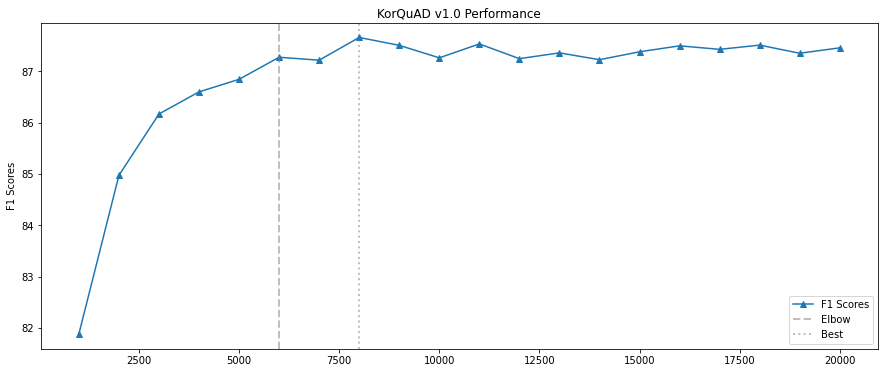

In [ ]:
#Elbow Method
!pip install kneed
!pip install matplotlib

import matplotlib.pyplot as plt
from kneed import KneeLocator

# Using readlines()
file1 = open(output_dir+'/eval_results.txt', 'r')
lines = file1.readlines()
scores = []
for line in lines:
    if line.startswith('f1_'):
        pairs = line.split('=')
        keys = pairs[0].split('_')

        check = int(keys[1])
        score = float(pairs[1])

        scores.append([check, score])

scores = np.array(scores)
scores = scores[scores[:,0].argsort()]
max_index = scores[:,1].argmax()

optimal_score = scores[max_index]
print('Best  Check Point : ', optimal_score)

#Elbow Point
kl = KneeLocator(scores[:,0], scores[:,1], curve="concave", direction="increasing")
print('Elbow Check Point : ', kl.elbow)

optimal_check_point = 'checkpoint-' + str(int(optimal_score[0]))

x = scores[:,0].tolist()
y = scores[:,1].tolist()

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('KorQuAD v1.0 Performance')
ax1.set_ylabel('F1 Scores')
ax1.plot(x, y, '-^')
ax1.axvline(kl.elbow, linewidth=2, ls = '--', color='grey', alpha=0.5)
ax1.axvline(optimal_score[0], linewidth=2, ls = ':', color='grey', alpha=0.5)
ax1.legend(['F1 Scores', 'Elbow', 'Best'], loc='lower right')
plt.show()

## 4.1 학습된 모델 불러오기

In [ ]:
#    "koelectra-base-v3": ElectraTokenizer,
#    "koelectra-small-v3": ElectraTokenizer,
#    "bert-base-uncased": BertTokenizer,
#    "bert-base-multilingual-cased": BertTokenizer,
#    "bert-base-multilingual-uncased" : BertTokenizer,
#    "kobert" : BertTokenizer,

# 가장 BEST 인 체크포인트를 가져옴
chk_pt_step = int(optimal_score[0])

print("chk_pt_step====>",chk_pt_step)
chk_pt_file =  output_dir+"/checkpoint-"+str(chk_pt_step)

print ('chk_pt_step=',chk_pt_step)
print ('chk_pt_file=',chk_pt_file)

if model_type == "koelectra-small-v3" or model_type == "koelectra-base-v3"  :
    tokenizer = ElectraTokenizer.from_pretrained(chk_pt_file)
    model = ElectraForQuestionAnswering.from_pretrained(chk_pt_file)
elif  model_type == "kobert"  or model_type == "bert-base-uncased" or model_type == "bert-base-multilingual-cased" or model_type == "bert-base-multilingual-uncased"  :
    tokenizer = BertTokenizer.from_pretrained(chk_pt_file)
    model = BertForQuestionAnswering.from_pretrained(chk_pt_file)
elif model_type == "monologg/kobert" :
    #tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')
    tokenizer = KoBertTokenizer.from_pretrained(chk_pt_file)
    model = BertForQuestionAnswering.from_pretrained(chk_pt_file)

#tokenizer = ElectraTokenizer.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/DFC615/output/checkpoint-18000")
#model = ElectraForQuestionAnswering.from_pretrained("/content/gdrive/MyDrive/Colab Notebooks/DFC615/output/checkpoint-18000")
prediction_qa = pipeline("question-answering", tokenizer=tokenizer, model=model)

context_question = {
    'question':'도지코인은 누구의 영향을 받나요?',
    'context':'일론머스크의 한마디에 도지코인은 오르락 내리락 오늘도 그의 트위터를 기다린다. 빨간맛 가즈아'
    
}
answer = prediction_qa(context_question)
print(answer)
print(answer['answer'])

ans_text = answer['answer']
print(ans_text)

chk_pt_step====> 8000
chk_pt_step= 8000
chk_pt_file= /content/gdrive/MyDrive/Colab Notebooks/DFC615/koelectra-small-v3_512_32_5e-05_10/output/checkpoint-8000
{'score': 0.7125729322433472, 'start': 0, 'end': 6, 'answer': '일론머스크의'}
일론머스크의
일론머스크의


In [ ]:
!ls

cached_dev_koelectra-small-v3-discriminator_512    KorQuAD_v1.0_train.json
cached_train_koelectra-small-v3-discriminator_512  output
KorQuAD_v1.0_dev.json				   test.json


## 4.2 기말고사 제출 리더보드용 파일생성

In [ ]:
#! pip install konlpy

#import nltk
import konlpy

# 조사를 제거해서 성능을 높힌다.
# Evaluation은 Exact Matching을 사용합니다.
# Accuracy와 비슷하게, Exact Matching은 주어진 정답을 완벽히 맞추는 것을 평가합니다.
# ex)
# test case가 3개인 경우,
# myanswers = ['안녕하세요.', '나비', '된장국을'] groundtruths = ['안녕하세요', '나비', '된장국']

# 이때, Exact Matching score는 1/3입니다.
#( '안녕하세요.' != '안녕하세요) X
#( '나비' == '나비') O
#(  '된장국을' != '된장국) X

my_answer = {}
my_answer['id']=[]
my_answer['prediction_text']=[]

for idx, sample in enumerate(test_json['data']):
    context = sample['context']
    question = sample['question']
    answer_dict = prediction_qa({'question':question,'context': context})
    predict_text = answer_dict["answer"]
    
    print(f'context {context}')
    print(f'question {question}')
    print(f'predict_text {predict_text}')
    print('\n')
    
    my_answer['id'].append(str(idx + 1))
    my_answer['prediction_text'].append(predict_text)
    



context 사회위해성이 있는 범죄라고 판단되는 행위에 대해서는 공안기관이 치안관리처벌법에 기초하여, 경고, 과료, 행정구류, 허가증의 취소, 외국인에 대하여는 국외추방이라고 하는 치안관리처벌을 부과한다. 치안관리처벌의 결정은 행정불복심사의 신청이나 행정소송에 의하여 다툴 수 있다. 그 외에, 일찍이 중국에는 법의 근거가 없는 행정처벌이나 법정의 절차를 준수하지 않는 행정처벌, 공포되지 않은 법령에 기초한 행정처벌을 볼 수 있었으나, 행정처벌법에는 이러한 행정처벌을 명문으로 금지하였다. 중국에는 일정한 직업을 가지지 아니한 자나 마약중독자 등에 대한 근로교정도 행해지고 있다. 근로교정의 시간은 최장 4년에 이르러, 그 절차나 운영에 관한 비판이 고조되고 있다.
question 사회에 해를 끼치는 범죄에 대해서 공안기관이 근거로 삼는 법안은 무엇인가?
predict_text 치안관리처벌법에


context 이후 일본의 강요로 1943년 조선기독교단으로 강제 통합당한 감리교회는, 해방후 다시 분리되어 새로 교단을 구성하는 과정에서 재건파와 복흥파로 분리되는 등 홍역을 앓았다. 그러나 그 이후 다시 통합되어 1949년 현재의 이름이 채택되었다. 이후 1971년 경기연회 사건으로 총리원과 총회(갱신)측으로 분리되기도 하였으나[3], 이후 재통합돼 감리교단은 현재 대한민국 개신교 교파중에서 유일하게 교파 분열을 겪지 않은 교회이다. 다만 2008년 감독회장 선거로 시작된 기독교대한감리회 감독회장 선출 논쟁이 있었으나 2013년 현재 전용재 목사가 감독회장에 당선됨으로써 일단락됐다. 현재까지 감독 선출과 교회 운영은 감리회 본부와 총회를 중심으로 이루어지고 있다.
question 전용재 목사가 감독회장에 당선된 연도는?
predict_text 2013년


context 일반적으로 자유가동을 하는 대부분의 유기체들은 기본적으로 유사한 위상 반응 곡선 (phase response curve, PRC)을 갖는다. 일주기 생체 리듬의 주기가 정확히 24시간이 아니기 때문에

In [ ]:
df = pd.DataFrame(my_answer)
df.head()

,id,prediction_text
0,1,치안관리처벌법에
1,2,2013년
2,3,빛은
3,4,타이베리움을
4,5,11월 3일


## 4.3 답변데이터 후처리


In [ ]:
#Hannanum(한나눔), Kkma(꼬꼬마), Komoran(코모란)
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Okt

def normalize_answer3(s):
    def remove_(text):
        # 괄호안 부가설명 모두 제거
        text = re.sub(r'\([^\)^\(]*\)?', '', text)

        #  불필요한 기호를 공백처리 하지 않고 제거
        text = re.sub("'", "", text)
        text = re.sub('"', "", text)
        text = re.sub('《', "", text)
        text = re.sub('》', "", text)
        text = re.sub('<', "", text)
        text = re.sub('>', "", text)
        text = re.sub('〈', "", text)
        text = re.sub('〉', "", text)
        text = re.sub("‘", "", text)
        text = re.sub("’", "", text)
        text = re.sub(",", "", text)
        return text

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        # %는 제외하자 
        exclude.remove('%')
        #exclude.remove(',')
        exclude.remove('-')
        return ''.join(ch for ch in text if ch not in exclude)

    def remove_josa(text):
        ##### Hannanum 를 이용한  조사제거 
        tokenizer_t = Hannanum() #조사제거
        pos = tokenizer_t.pos(text)
        subs = text.split()
        head = ' '.join(w for w in subs[:-1])
        tail = subs[len(subs)-1]

        # J:조사, E:어미, V:동사 
        prefix_rules = ('J','E')        

        #마지막 단어의 조사 및 어미를 제거
        for i in reversed(range(len(pos))):
            if pos[i][1].startswith(prefix_rules):
                tail = re.sub(pos[i][0] + '$', "", tail)
            else:
                break;

        text = ' '.join([head, tail]).strip()

        ##### Kkma 를 이용한  조사제거 
        tokenizer_k = Kkma()
        pos = tokenizer_k.pos(text)
        subs = text.split()
        head = ' '.join(w for w in subs[:-1])
        tail = subs[len(subs)-1]

        # J:조사, E:어미, V:동사 
        prefix_rules = ('JKG' , 'JKM', 'JKS', 'JX', 'JC', 'JKO')        

        #마지막 단어의 조사 및 어미를 제거
        for i in reversed(range(len(pos))):
            if pos[i][1].startswith(prefix_rules):
                tail = re.sub(pos[i][0] + '$', "", tail)
            else:
                break;

        text = ' '.join([head, tail]).strip()        


        ##### Okt 를 이용한  조사제거 
        tokenizer_o = Okt()
        pos = tokenizer_o.pos(text)
        subs = text.split()
        head = ' '.join(w for w in subs[:-1])
        tail = subs[len(subs)-1]

        # J:조사, E:어미, V:동사 
        prefix_rules = ('Josa')        

        #마지막 단어의 조사 및 어미를 제거
        for i in reversed(range(len(pos))):
            if pos[i][1].startswith(prefix_rules):
                tail = re.sub(pos[i][0] + '$', "", tail)
            else:
                break;

        text = ' '.join([head, tail]).strip()   

        return text

    def lower(text):
        return text.lower()

    return white_space_fix(remove_punc(lower(remove_josa(remove_(s)))))

In [ ]:

new_answer = []

for sentence in df['prediction_text']:

    sentence = normalize_answer3(sentence)    

    # 한자 제거
    sentence = re.sub(r'[\u4e00-\u9fff]+', '', sentence)   

    new_answer.append(sentence)
    print (sentence)

df['prediction_text'] = new_answer

치안관리처벌법
2013년
빛
타이베리움
11월 3일
대구 경북지역
10%
일렉트로 트랩
제3차 하리코프 공방전
동대문아파트
사라예보
경영자
자신의 개인 활동
다케조에 신이치
검은 꽃
섭외민사관계 법률적용법
김대중 김종필
쥐트슐라이페
이완
22조 9000억원
600000장
음악적 예술 형태이다
시카고 블루스
세계일보
블록체인
지난해 4월
부산
30일간
마스크
샤이크 미스킨
15년
sbs
1992년
장진
요르단 강
서울올림픽주경기장
이두황
업의 성질
정수기 cf
차범근 축구교실
송파구 장미아파트
4월 3일
300만 원
이회창
진상은 이렇
평민당사
이븐 알나딤
문헌
2007년 12월 7일
윤상 콘서트-play
하프연주
대포동 2호
인천
워싱턴포스트 신문
2012년 7월 5일
화합적취 즉 화합하여 쌓인다는 뜻이다
김홍집
환경권
우리 집에 왜 왔니
see-through hmd
도둑들
알렉산드르 1세
최동훈
1천100억 달러
승해
내부 기생충
점프 블루스
스크린
김구
약 100년
암호화폐
정도전
대륙 철학
상수도와 하수도
초등학교 교사
하페즈 알아사드
아덴만 여명작전
김영대
1949년
1986년
향토예비군법 폐지안
뮈
비율
사
김대중
암흑국가
북한 잠수함 침투사건
해금 정책
후쿠시마 원전사고이후
제국의 아이들
김옥균
미국 육군 부참모 총장
동진사
호남출신
10명
7월 8일
죄형법정주의
일본 닌텐도 스페이스 월드 엑스포
24명
3가지
abc방송사
clichè
2014년
로베르타 캐슬린 팍스
공무원 급여
국민신당
1958년
전국 천하영웅의 시대
체크메이트
블루스 페스티벌
구약학
빌헬름 마르크스
40명
할아버지
노무현 정권
도올 김용옥


In [ ]:
df.to_csv('my_answer_'+model_type+'_'+str(num_train_epochs)+'.csv', index=False, encoding='utf-8')

In [ ]:
df

,id,prediction_text
0,1,치안관리처벌법
1,2,2013년
2,3,빛
3,4,타이베리움
4,5,11월 3일
...,...,...
111,112,빌헬름 마르크스
112,113,40명
113,114,할아버지
114,115,노무현 정권


#5. 캐글 리더보드 제출



캐글 리더보드 위치 https://www.kaggle.com/c/dfc61500